In [1]:
NAME = "Matthew Martin"
COLLABORATORS = ""

## Project Topic
For my project I will be using the "Higher Education Students Performance Evaluation Dataset Data Set" from https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset. This will be a classification project to determine if there are attributes, or combinations of attributes, that might predict a students' end-of-term performance. The motivation for this project is to 1) put into practice some of the techniques and skills we have learned over the semester and 2) determine if there are attributes (either of the student, their family, or their education habits) that provide a strong correlation for the student doing well or not doing well. An example of the second objective would be to see if having additional work correlates to not doing well or if always attending class correlates to doing well. This will be a particularly interesting topic to explore and to reflect on in regards to have well it fits with my experience in this program so far.

## Data

**Citation:** 
Nevriye Yilmaz, (nevriye.yilmaz '@' neu.edu.tr) and Boran Sekeroglu (boran.sekeroglu '@' neu.edu.tr). *Higher Education Students Performance Evaluation Dataset Data Set.* https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset#

This data is from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.php) and comes in the form of a .CSV file. This data set “was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019” (Yilmaz and Sekeroglu). For the purposes of my analysis I will read the .CSV file data directly from the website above rather than copying it to a local location. 

The data consists of 145 instances, 33 attributes, and characterizes missing values as “N/A.” The .CSV file contains students numbered 1-145 (presumably for anonymity) and simply lists the question identifiers from 1-30 with two extra columns containing the “COURSE ID” and “GRADE.” The data type of all of the responses is an integer (except for missing values which is described above). The questions corresponding to the question identifiers are as follows (from Yilmaz and Sekeroglu):

1. Student Age (1: 18-21, 2: 22-25, 3: above 26)
2. Sex (1: female, 2: male)
3. Graduated high-school type: (1: private, 2: state, 3: other)
4. Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5. Additional work: (1: Yes, 2: No)
6. Regular artistic or sports activity: (1: Yes, 2: No)
7. Do you have a partner: (1: Yes, 2: No)
8. Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9. Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10. Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11. Mothers education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12. Fathers education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14. Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15. Mothers occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16. Fathers occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17. Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18. Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19. Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21. Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22. Attendance to classes (1: always, 2: sometimes, 3: never)
23. Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24. Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25. Taking notes in classes: (1: never, 2: sometimes, 3: always)
26. Listening in classes: (1: never, 2: sometimes, 3: always)
27. Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28. Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29. Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30. Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. Course ID
32. OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline
import math
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
st = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv', delimiter=';')

In [4]:
st.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


A quick look at the columns in the data

In [5]:
st.columns

Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')

A quick look at the data type in each column

In [6]:
st.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

## Data Cleaning

For data cleaning I will be doing a few things:
* First I will rename all of the columns to make the translation from the generic column name to the question easier to do
* I want to make available as much of this data set as possible so my plan is to only ignore "N/A" values in the sample space that I am concerned with for each item. For example, in my hypothesis testing of whether or not having additional work correlated to doing well (or not well) in the class, I would only ignore student's with a "N/A" in that sample space.
    * Note - there do not appear to be any "N/A" values in this data so I expect this to simply be a check and that it will not actually limit my sample space.
* For a last check, I will validate that the values I get for each hypothesis test in the sample space I am concerned with, are valid values e.g. if a student had a value of "3" for "Do you have a partner," I would ignore that student given that the only valid values are "1" or "2."

If you referenced any web sites or solutions not of your own creation, list those references here:

* List any external references or resources here
    * https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/

Below is an example of cleaning the data by renaming the column headers to reduce continual lookup of the corresponding meaning

In [7]:
st = st.rename(columns={"1": "Student Age", "2": "Sex", "3": "Graduated high-school type", "4": "Scholarship type",
                  "5": "Additional work", "6": "Regular artistic or sports activity", "7": "Do you have a partner",
                  "8": "Total salary if available", "9": "Transportation to the university", "10": "Accomodation type in Cyprus",
                  "11": "Mothers education", "12": "Fathers education", "13": "Number of sisters/brothers",
                  "14": "Parental status", "15": "Mothers occupation", "16": "Fathers occupation", "17": "Weekly study hours",
                  "18": "Reading frequency (non-scientific)", "19": "Reading frequency (scientific)",
                  "20": "Attendance to the seminars/conferences related to the department",
                  "21": "Impact to your projects activities on your success", "22": "Attendance to classes",
                  "23": "Preperation to midterm exams 1", "24": "Preperation to midterm exams 2", "25": "Taking notes in class",
                  "27": "Discussion improves my interest on success in the course", "28": "Flip-classroom",
                  "29": "Cumulative grade point average in the last semester", "30": "Expected cumulative grage point average in the graduation",
                  })
st

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preperation to midterm exams 1,Preperation to midterm exams 2,Taking notes in class,26,Discussion improves my interest on success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected cumulative grage point average in the graduation,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


To further clean the data some, I will remove some of the columns to simplify the problem some. This will be done based on my hypothesis testing that only things like past performance, current effort, or extra curricular activities will have an impact on course performance.

In [8]:
st = st[["Sex", "Additional work", "Regular artistic or sports activity", "Total salary if available", "Weekly study hours", "Reading frequency (non-scientific)", 
         "Reading frequency (scientific)", "Attendance to classes", "Preperation to midterm exams 1", "Preperation to midterm exams 2", "Taking notes in class",
         "Cumulative grade point average in the last semester", "COURSE ID", "GRADE"]]
st

,Sex,Additional work,Regular artistic or sports activity,Total salary if available,Weekly study hours,Reading frequency (non-scientific),Reading frequency (scientific),Attendance to classes,Preperation to midterm exams 1,Preperation to midterm exams 2,Taking notes in class,Cumulative grade point average in the last semester,COURSE ID,GRADE
0,2,1,2,1,3,2,2,1,1,1,3,1,1,1
1,2,1,2,1,2,2,2,1,1,1,3,2,1,1
2,2,2,2,2,2,1,2,1,1,1,2,2,1,1
3,1,1,2,2,3,1,2,1,1,2,3,3,1,1
4,2,2,2,3,2,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,1,1,1,3,3,2,1,1,1,2,3,9,5
141,1,2,2,1,3,2,2,2,1,1,3,5,9,5
142,1,2,2,1,2,2,2,1,1,1,3,4,9,1
143,1,1,1,5,2,2,1,1,2,1,2,5,9,4


Below is a check to see if there are any "N/A" or erroneous values in "Additional work"

In [9]:
#print(st["Additional work"].values)
values = []
for i in st["Additional work"].values:
    if i not in values:
        values.append(i)

# the only available values for "Additional work" are 1: Yes, and 2: no
# the below is a check to ensure no erroneous values in this sample space
AvailableValues = [1,2]

# the below is a check for any NaN values
nanValues = st["Additional work"].isnull().values.any()

print("Values in 'Additional work'", values)
print("Are the values in 'Additional work' valid?", values == AvailableValues)
print("Are there any NaN values?", nanValues)

Values in 'Additional work' [1, 2]
Are the values in 'Additional work' valid? True
Are there any NaN values? False


## Exploritory Data Analysis

First I thought I should just look at the distributions of grades through a simple describe. This fell reasonably well in with my expectations of the data. The mean was close to half way between 0-7, though there were more students in the bottom half with 50% falling below a 3 (CC). There were also 145 counted grades which matches the size of the data I am looking at.

In [10]:
st.GRADE.describe()

count    145.000000
mean       3.227586
std        2.197678
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: GRADE, dtype: float64

To start my exploratory analysis I want to just look at a histogram and bar chart of the grades in the course. One would assume, if this were a normal case, that this should represent a bell curve or be skewed perhaps left some. As you can see below from this histogram it is not however. There appear to be a lot of failing students and only a few that were receiving high marks. This makes sense in the context of the describe that I did above however. With a majority of the students receiving a 1, 2, or 3 as their mark. 

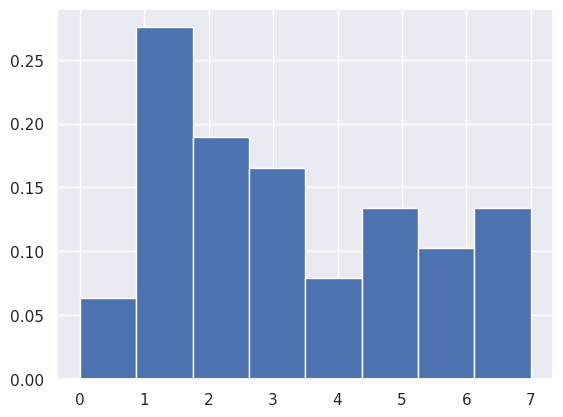

In [11]:
plt.hist(st["GRADE"], density=True, bins=8);

<AxesSubplot: >

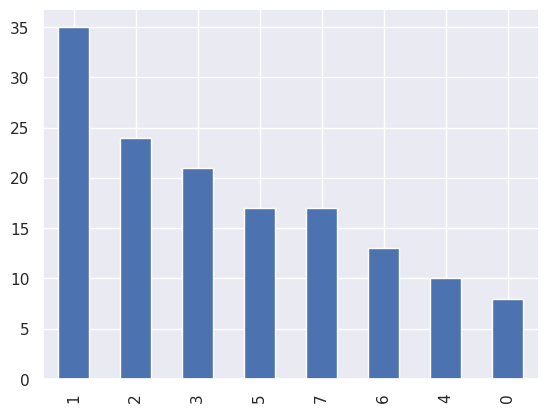

In [12]:
st["GRADE"].value_counts().plot(kind='bar')

Next, I thought it would be interesting to see if there is a difference in performance between men and women. Below you can see that men performed better than women by a little with an average around a CC compared to a DC. There also appear to be no women in this set of data scoring the highest mark possible (AA) or men scoring the lowest mark (Fail). It will be interesting to look at other variables in a similar way as a part of the final portion of this project.

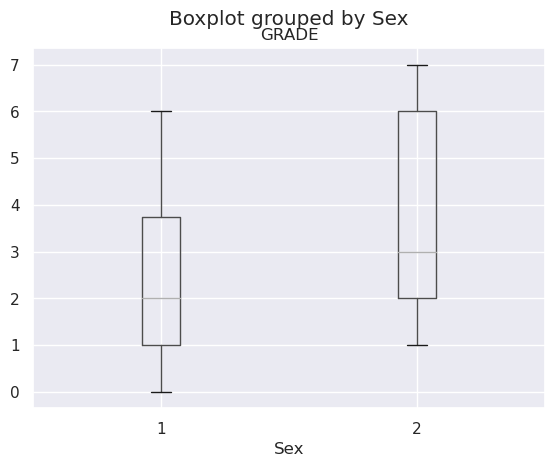

In [13]:
st.boxplot(column='GRADE', by='Sex');

This propted me to look at grade and sex just a little closer so I did a kernal density estimate plot of just sex and grade and you can see that the the men (first plot) had a little more uniform scoring with some high counts in lower grades and some high counts in the higher grades. For Women (second char) that does not appear to be the case though. They were more right skewed with more scoring in the 0-3 range and then having fewer and fewer high marked students.

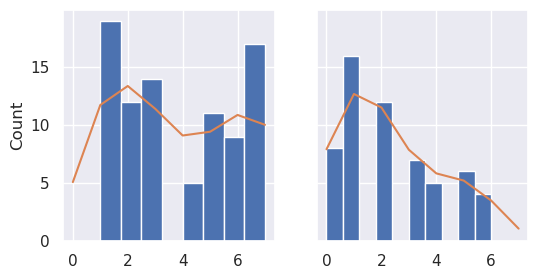

In [14]:
GradeMen = st.GRADE[ st.Sex==2].dropna().values
GradeWomen = st.GRADE[ st.Sex!=2].dropna().values

fig,ax = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(6,3))

ax[0].hist(GradeMen, bins=8)
density = scipy.stats.gaussian_kde(GradeMen)
x = np.arange(0,8)
ax[0].plot(x, density(x)*87)
ax[0].set_ylabel('Count');

ax[1].hist(GradeWomen)
density = scipy.stats.gaussian_kde(GradeWomen)
x = np.arange(0,8)
ax[1].plot(x, density(x)*58);

Lastly, I thought I would do a little more complicated plot by looking at a multi-linear model without interactions predicting the grade on the other columns of 'weekly study hours', 'cumulative GPA', and 'total salary'. As you can see from both the simple table and the more complicated summary of the multi-linear model, there does not appear to be any single items that have an overly strong correlation between the course grade and at least those columns. Even just looking at the relationship between the course grade and cumulative GPA there doesnt seem to be a strong correlation, which I found to be surprising. 

In [15]:
#stg = st[st.columns[~st.columns.isin(["STUDENT ID", "COURSE ID"])]]
stg = st[["GRADE", "Sex", "Weekly study hours", "Cumulative grade point average in the last semester","Total salary if available"]]
stg = stg.rename(columns={"Weekly study hours": "Study_hours", "Cumulative grade point average in the last semester": "cGPA", "Total salary if available": "Salary"})
stg.groupby(['Sex', 'GRADE']).mean()

Study_hours      cGPA    Salary
Sex GRADE                                 
1   0         2.500000  2.000000  2.250000
    1         2.187500  2.437500  1.375000
    2         2.166667  2.250000  2.000000
    3         3.142857  3.285714  1.571429
    4         2.000000  3.800000  1.800000
    5         1.666667  3.666667  1.166667
    6         2.250000  3.250000  1.250000
2   1         2.210526  2.578947  1.789474
    2         1.750000  3.250000  1.916667
    3         2.214286  4.071429  1.785714
    4         2.400000  3.200000  1.400000
    5         2.272727  4.272727  1.181818
    6         2.111111  3.666667  1.111111
    7         2.176471  3.117647  1.647059

In [16]:
est = smf.ols('GRADE ~ Study_hours+cGPA+Salary', stg).fit()
#est.summary().tables[1]
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.422
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000415
Time:                        17:31:30   Log-Likelihood:                -310.13
No. Observations:                 145   AIC:                             628.3
Df Residuals:                     141   BIC:                             640.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3888      0.711      3.359      0.001       0.983       3.795
Study_hours    -0.1181      0.190     -0.621      0.535      -0.494       0.258
cGPA            0.5096      0.134      3.800      0.000       0.244       0.775
Salary         -0.3031      0.172     -1.764      0.080      -0.643       0.037
==============================================================================
Omnibus:                       10.907   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.210
Skew:                           0.585   Prob(JB):                      0.00607
Kurtosis:                       2.433   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
est = smf.ols('GRADE ~ cGPA', stg).fit()
#est.summary().tables[1]
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           0.000111
Time:                        17:31:30   Log-Likelihood:                -311.82
No. Observations:                 145   AIC:                             627.6
Df Residuals:                     143   BIC:                             633.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5627      0.453      3.447      0.001       0.667       2.459
cGPA           0.5329      0.134      3.976      0.000       0.268       0.798
==============================================================================
Omnibus:                       12.732   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.929
Skew:                           0.587   Prob(JB):                      0.00423
Kurtosis:                       2.344   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exploratory Data Analysis Conclusion/Discussion

From the initial look at the data, it appears that it will be a challenge to find single variables that have a strong correlation to high (or low) marks in the class. There will undoubtably be single variables that have some correlation like was demonstrated above by looking at sex, but the success rate of those will be low (again like was demonstrated with sex). What seems to be more likely is that it will be some combination of n number of variables that combined will provide a better prediction of the final grade. One of the difficulties I foresee with this analysis is determining exactly what combination of variables can predict the result.

## Model Approach

For my final analysis I believe I will look at K-Nearest Neighbors (KNN) and/or forward stepwise selection for determining variables, or combination of variables, that can predict a student’s outcome. Both models seem well set to evaluate the relationship between multiple variables. Both models are also discussed in the last couple of weeks of this course which will provide a good opportunity to implement learnings from this course on a real problem (one of my stated goals for this project). One of the challenges I see with KNN is that the data set I am working with is relatively small (145) so developing a training set out of the full set will likely result in both sets being of relatively small size or as the size increases, so will the duplication of values. This problem seems to be something I will have to manage with the forward stepwise selection process as well. The other challenge that I will have to consider is the number of available variables to use in the potential model. There are several different variables that could be used in this process. I will limit this some by hypothesis testing of some subset of these variables. This has also been limited some by initial data cleaning activities.

## Models, Results, and Analysis

### Forward Stepwise Selection

To look at my data I will start with a Forward Stepwise selection process following a similar approach to what we did in homework assignment 7. This will look at the relation between each individual variable and the outcome of grade. Once I find the single variable with the highest correlation (using the adjusted R^2 value) I will look for the best 2, 3, 4, and 5 variable sets. I have limited my variable data set for this exercise to a smaller subjset based on wanting to hypothesis test that I can guess which variables have the most impact. Given the small sample set of data I have, I will use the full dataset rather than spliting between a training and test set.

In [18]:
st_fss = st.rename(columns={"Student Age": "Student_Age", "Additional work": "Additional_work", "Regular artistic or sports activity": "Regular_art_or_sports_activity",
                            "Mothers education": "Mothers_education", "Fathers education": "Fathers_education",
                            "Attendance to classes": "Attendance_to_classes", "Taking notes in class": "Taking_notes_in_class",
                            "Total salary if available": "Total_salary", "Preperation to midterm exams 1": "Prep_exam_1",
                            "Preperation to midterm exams 2": "Prep_exam_2", "Cumulative grade point average in the last semester": "Cgpa",
                           "Weekly study hours": "Weekly_study", "Reading frequency (non-scientific)": "Reading_nonSci",
                           "Reading frequency (scientific)": "Reading_sci"})

In [19]:
st_fss.columns.values.tolist()

['Sex',
 'Additional_work',
 'Regular_art_or_sports_activity',
 'Total_salary',
 'Weekly_study',
 'Reading_nonSci',
 'Reading_sci',
 'Attendance_to_classes',
 'Prep_exam_1',
 'Prep_exam_2',
 'Taking_notes_in_class',
 'Cgpa',
 'COURSE ID',
 'GRADE']

**K = 1 value**

In [20]:
FSR1 = smf.ols('GRADE ~ Sex', st_fss).fit()
FSR1.rsquared_adj

0.106376835191067

"Sex" has the highest correlation to grade when evaluating a single K value (.10637)

**K = 2 Value**

In [21]:
FSR1 = smf.ols('GRADE ~ Sex*Cgpa', st_fss).fit()
FSR1.rsquared_adj

0.16004263033955013

The combination of "Sex and Cumulative GPA in the last semester" had the highest adjusted R^2 value of .1600426

**K = 3 Value**

In [33]:
FSR1 = smf.ols('GRADE ~ Sex*Cgpa*Reading_nonSci', st_fss).fit()
FSR1.rsquared_adj

0.19813945263164345

By adding "Reading frequency (non-scientific)" I was able to improve the adjusted R^2 value a little more to .19814

**K = 4 Value**

In [48]:
FSR1 = smf.ols('GRADE ~ Sex*Cgpa*Reading_nonSci*Prep_exam_1', st_fss).fit()
FSR1.rsquared_adj

0.2280031052557271

Adding the fourth variable of "Preperation to midterm exams 1" improved the adjusted R^2 value to .228

**K = 5 Value**

In [56]:
FSR1 = smf.ols('GRADE ~ Sex*Cgpa*Reading_nonSci*Prep_exam_1*Taking_notes_in_class', st_fss).fit()
FSR1.rsquared_adj

0.22583577555025103

Adding a 5th variable to the mix actually started to degrade the prediction. By adding "Taking notes in class" the adjusted R^2 value decreased slightly to .225836

Below is just a plot of the resulting $\textit{adjusted}~R^2$ *vs* number of predictors for my dataset

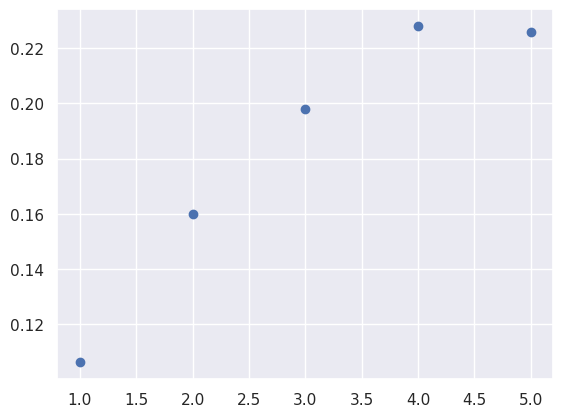

In [57]:
R_sqr = [0.106376835191067, 0.16004263033955013, 0.19813945263164345, 0.2280031052557271, 0.22583577555025103]
Num_pred = [1,2,3,4,5]
plt.scatter(Num_pred, R_sqr)

**Summary of Results and Analysis Forward Stepwise Selection**

This plot shows a clear improvement through the first 4 variables that tapers off, or even decreases after adding the 5th variable. None of the combinations in my hypothesis testing set appeared to provide a great level of predictability however. The variables that appear to have the closest ability to predict the course outcome, at least from my hypothesis test, were: 'Sex', 'Cumulative grade point average in the last semester', 'Reading frequency (non-scientific)', and 'Preparation to midterm exams 1.' I had suspected that exam prep and cumulative GPA would have been good indicators of a student's success but sex and reading frequency (only for non-scientific) were surprising to me.

This analysis of course was limited to only some of the variables for which I thought might have an impact. I intentionally left off some of the variable as I did not want to include them in my hypothesis testing and to do the manual version of forward stepwise selection would have required a lot more manual work. I will now compare these results to a KNN analysis.

**KNN**

The following will be a KNN analysis of the same data. This time I will use more variables to see if we can get a better model than the above in prediction of a GRADE.

Note – a lot of the code below has been adapted from *Titanic Survival Prediction using KNN Classifier.* lohitha17. https://www.kaggle.com/code/lohitha17/titanic-survival-prediction-using-knn-classifier

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

In [70]:
st_knn = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv', delimiter=';')

In [83]:
X = np.array(st_knn.filter(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                            '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'], axis=1))
y = np.array(st_knn.filter(['GRADE'], axis=1))

X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

final_scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr.ravel())
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 19

 CV accuracy for k=2 is 22

 CV accuracy for k=3 is 19

 CV accuracy for k=4 is 19

 CV accuracy for k=5 is 19

 CV accuracy for k=6 is 22

 CV accuracy for k=7 is 29

 CV accuracy for k=8 is 25

 CV accuracy for k=9 is 25

 CV accuracy for k=10 is 25


In [84]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)

6


In [85]:
df_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv', delimiter=';')

In [87]:
X_test = np.array(df_test.filter(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                            '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'], axis=1))
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_tr, y_tr.ravel())
pred = knn.predict(X_test)
print(pred)

[1 5 1 1 2 1 1 0 1 1 0 4 1 1 1 1 1 1 3 1 1 1 3 1 1 1 4 1 5 5 5 3 1 1 2 1 5
 7 1 1 1 1 1 1 1 3 3 2 1 1 3 1 1 1 3 3 3 1 3 0 2 1 1 1 1 2 1 1 1 1 5 6 3 1
 1 6 7 1 1 1 1 3 3 1 3 1 3 1 4 1 5 5 1 1 3 5 1 1 1 1 5 1 5 1 1 1 5 6 1 7 1
 1 1 1 1 1 1 1 1 7 1 1 2 1 0 1 0 1 1 1 1 3 2 1 5 1 0 1 1 0 1 1 1 0 1]


In [88]:
df_test['GRADE'] = pd.Series(pred, index=df_test.index)
df_test

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,5
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,0


In [117]:
grades_data = np.array(st_knn['GRADE'].tolist())
grades_pred = np.array(df_test['GRADE'].tolist())
#grades
match = 0
i = 0
while i < len(grades_data):
    if grades_data[i] == grades_pred[i]:
        match = match + 1
    i = i +1
print("Percent of matching grades from the predictive model to actuals is =", match/len(grades_data))

Percent of matching grades from the predictive model to actuals is = 0.3310344827586207


Using KNN I was able to correctly guess 33% of the overall grades based on the optimal 'k' number of variables defined above. This is not terrible. To validate though, I will look at a couple of other measures like adjusting to see how accurate the model is if I allow for one degree of error on the grade (e.g. if the actual is a BA, I'll count a match as a BB, BA, or AA). This should improve the predictibility.

In [118]:
match = 0
i = 0
while i < len(grades_data):
    if grades_data[i] == grades_pred[i]-1 or grades_data[i] == grades_pred[i] or grades_data[i] == grades_pred[i]+1:
        match = match + 1
    i = i +1
print("Percent of matching grades from the predictive model to actuals is =", match/len(grades_data))

Percent of matching grades from the predictive model to actuals is = 0.5310344827586206


By allowing for a little more flexibility in the model, I was able to get to being able to predict a students success to 50%. This seems more appropriate as a measure since, in practice anyway, I think one would simply want to know how well a student might do. If it was assumed the student would get a ‘B’ but they ended up with a ‘B-‘ or a ‘B+’ I think generally we would say the prediction was pretty good.

Below is one more view of things where I manually change the number of neighbors to use. Interestingly using the "optimal_k" did not provided the highest prediction success. Using a smaller number of variables actually improved the model compared to the “optimal_k” value, at least as calculated above.

In [126]:
X_test = np.array(df_test.filter(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                            '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'], axis=1))
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_tr, y_tr.ravel())
pred = knn.predict(X_test)
df_test['GRADE'] = pd.Series(pred, index=df_test.index)
grades_data = np.array(st_knn['GRADE'].tolist())
grades_pred = np.array(df_test['GRADE'].tolist())
#grades
match = 0
i = 0
while i < len(grades_data):
    if grades_data[i] == grades_pred[i]:
        match = match + 1
    i = i +1
print("Percent of matching grades from the predictive model to actuals is =", match/len(grades_data))

Percent of matching grades from the predictive model to actuals is = 0.3310344827586207


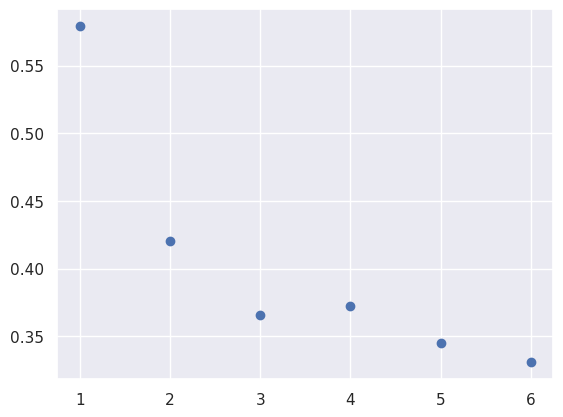

In [129]:
KNN_Neighbors = [0.5793103448275863, 0.4206896551724138, 0.36551724137931035, 0.3724137931034483, 0.3448275862068966, 0.3310344827586207]
Num_pred = [1,2,3,4,5, 6]
plt.scatter(Num_pred, KNN_Neighbors)

**Summary of Results and Analysis of KNN**

KNN was able to provide another means for prediction. The method used above allowed for use of a variable 'k' number of neighbors to evaluate and make a prediction of the grade. As we saw in class, more is not always better, and the use of smaller 'k' number of neighbors actually equated to a closer match to the given data than using larger 'k' number of neighbors though. At best, the model appeard to be able to predict a students grade about 50% of the time. This is not terrible but not great. The model can be improved some if we allow for some flexibility in what is considered a match e.g. counting a grade that is +/- 1 away from the actual grade. This approach seems reasonable since the difference between grades can be just a few percent is some cases e.g. a 82% could be considered a 'B-' with a 83.1% being a 'B' and a 79.9% being a 'C+.'

## Discussion and Conclusion

I found this to be an interesting project to work on. I was a little surprised by the results, which I suppose could be a good thing, or it could be a product of the dataset that was used. 

The first learning/takeaway that I had is that I found the Forward Stepwise Selection process to be very intuitive and helpful in stepping through an analysis like this. To find the one, singular, item that provides the best prediction of the result and then adding onto that one item until the predictions reach a point of diminishing returns seems very appropriate and straight forward for this type of analysis. This approach was largely enabled by the fact that my data set only had a small number of variables, that I then made even smaller. If this analysis had been done on a dataset with many more variables, this process would be overly burdensome to complete unless the variables were filtered (as I did in my project) to a smaller subset based on some hypothesis testing. This would have the advantage of providing a manageable set to explore but the disadvantage of potentially leaving some insight on the table if the filtered variables did not include the items that truly had the most correlation. In the future I would like to explore ways to automate this process to allow for more variable analysis.

The second learning/takeaway I had was that visualizing the data is not always necessary. For example, with the KNN analysis, a visualization could have been done but I am not sure what value it would have added. To do a visualization of KNN with two variables would result in something like what is typically displayed for KNN and can have some impact but is not necessary. Instead, having a model that can output the prediction for every individual student and then be able to check that against the actual data seemed to be more valuable for me. I had sort of assumed at the beginning of this class that visualizations would be the best for some of this stuff but a usable output like the prediction table and ability to compare it to the actuals was just as interesting to me. 

Overall, I found this to be an interesting project though. I was definitely able to meet my motivation/objectives set forth at the onsite of the project to 1) put into practice some of the techniques and skills we have learned over the semester and 2) determine if there are attributes (either of the student, their family, or their education habits) that provide a strong correlation for the student doing well or not doing well.